1. Title: Qualitative_Bankruptcy database

2. Source Information
   	-- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
  	-- Guided By: Dr.V.Prasanna Venkatesan
   	-- Date:      February 2014

3. Past Usage:
	The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of experts’ 
	decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

Internal Risks: 	
i.Industry risk (IR) : 
	Government policies and International agreements, 
	Cyclicality, 
	Degree of competition,				
	The price and stability of market supply,
	The size and growth of market demand,	
	The sensitivity to changes in macroeconomic factors,
	Domestic and international competitive power, 
	Product Life Cycle.
ii.Management risk(MR): 
	Ability and competence of management, 
	Stability of management,
	The relationship between management/ owner, 
	Human resources management, 
	Growth process/business performance, 
	Short and long term business planning, 
	achievement and feasibility. 
iii.Financial Flexibility(FF): 
	Direct financing, 
	Indirect financing, 
	Other financing 
iv.Credibility (CR):  
	Credit history,  
	reliability of information, 
	The relationship with financial institutes.
v.Competitiveness (CO):  
	Market position, 
	The level of core capacities, 
	Differentiated strategy, 
vi.Operating Risk (OP):  
	The stability and diversity of procurement, 
	The stability of transaction, 
	The efficiency of production, 
	The prospects for demand for product and service, 
	Sales diversification,
	Sales price and settlement condition, 
	Collection of A/R,
	Effectiveness of sale network.
 
7. Missing Attribute Values: None
 
8. Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal


### Problem Statments

Please follow the below steps to complete the project ( 30 points)
1. Read the dataset and understand the features and target variable. 2 points
2. Encode independent features. 2 points
3. Separate the dependant variable from the rest of the train data 1 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5. Apply PCA on the independent features of train data. 1 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance). 3 points
7. Transform the data using PCA ( select optimum number of PCs). 2 points
8. Apply KMeans algorithm on the above transformed data. 3 points
9. Select optimal number of clusters and form clusters out of the train data. 5 points
10. Create a new column in the train data and populate it with the cluster labels. 2 points
11. Transform the test data using the same PCA object that was fit on the train data. 2 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature. 2 points
13. Apply any classification model (example: Logistic Regression) on train dataset and
predict target for test dataset. 3 points
14. Check accuracy and confusion matrix. 1 point

In [102]:
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

In [103]:
bd_df = pd.read_csv("Qualitative_Bankruptcy.data.txt", names =["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])

In [104]:
bd_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [105]:
bd_df.shape

(250, 7)

### 1. Finding the unique label in each columns

In [106]:
for col in bd_df:
    print (col)
    print (bd_df[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


#### Summary of DataFrame

In [107]:
bd_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


#### The columns are in categorical  For EDA purposes the data needs to be converted into numerical form using Label Encoding therefore assign all the columns name to a variable to perform Label Encoding and use FOR loop to iterate through values.

In [108]:
column = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
def func_labelEncoder(column,features):
    encode= LabelEncoder()
    features[column] = encode.fit_transform(features[column].astype(str))
    
for i in column:
    func_labelEncoder(i,bd_df)

In [109]:
bd_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [110]:
bd_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


#### Checking for the null values

In [111]:
bd_df.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

### plotting the pair plot

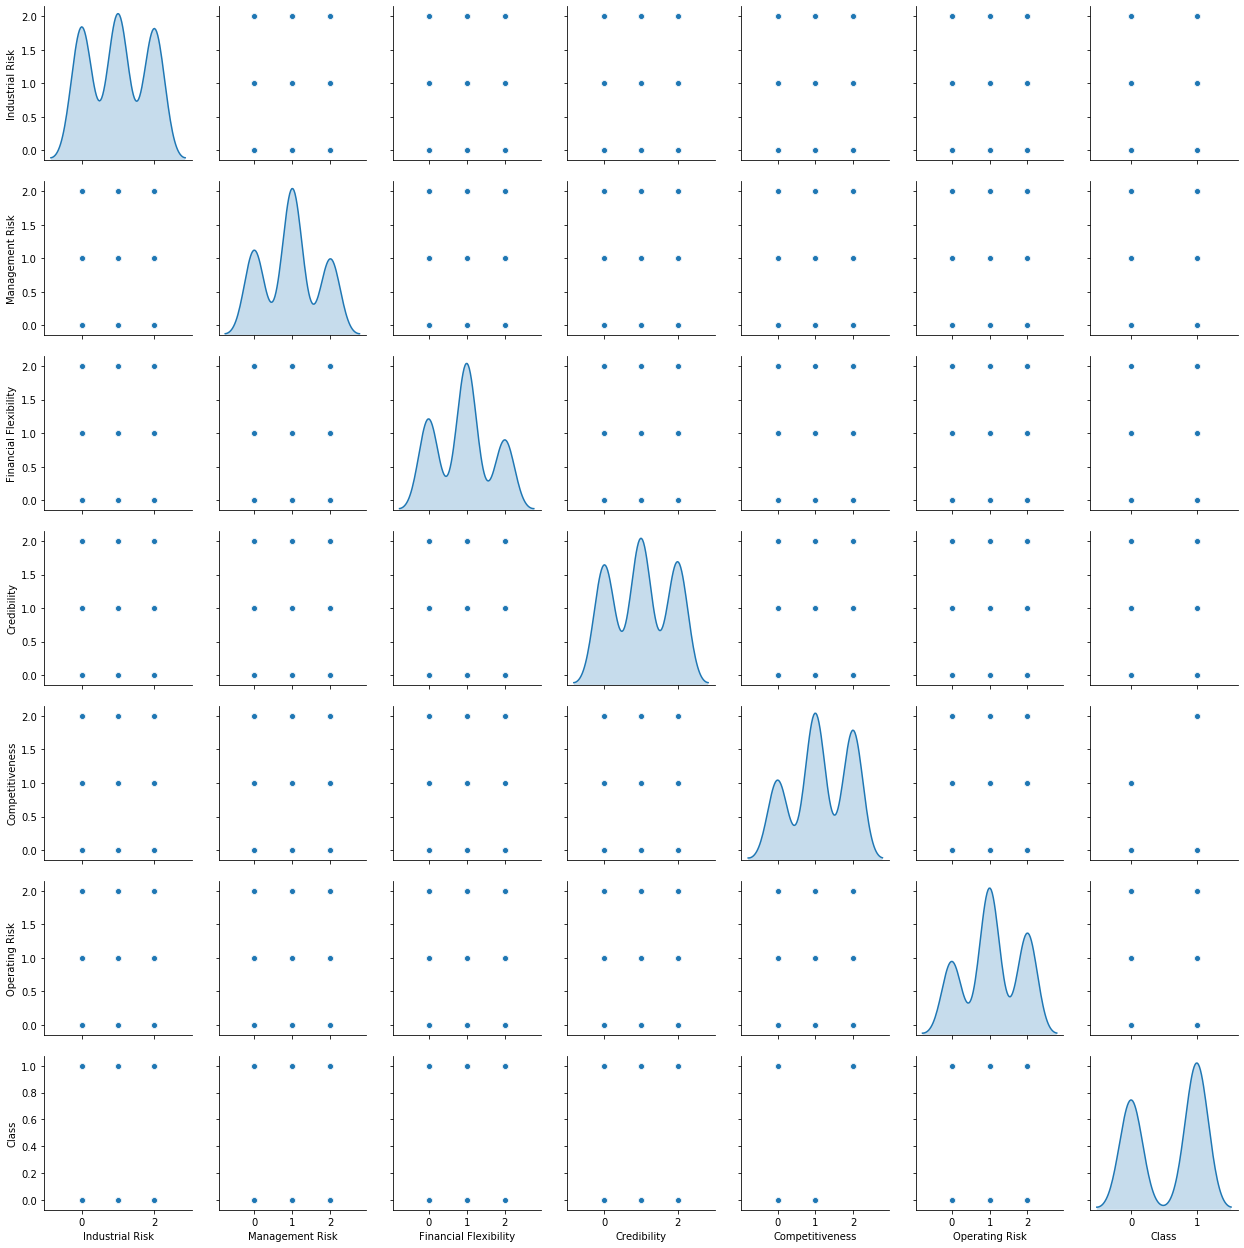

In [112]:
sns.pairplot(bd_df,diag_kind='kde')

### finding the co-relation between the columns

In [113]:
bd_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


#### Observation - It can be seen that the correlation between different variables are between -0.5 to 0.5, therefore all variables can be considered for developing prediction model.

#### Storing the dependent variables to xVal and independent variable to yVal

In [114]:
xVal = bd_df.drop(['Class'], axis=1)

In [115]:
xVal.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [116]:
xVal.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [117]:
xVal.to_numpy()

array([[2, 2, 0, 0, 0, 2],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [2, 1, 1, 1, 0, 0]])

In [118]:
yVal = bd_df.Class.values.reshape(-1,1)

In [119]:
yVal.shape

(250, 1)

### 4. Split the whole dataset into test and train row.The train data will be 80% of the total dataset and test data will be 20% of the dataset.

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [121]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200, 1)
Y_test shape: (50, 1)


### 5. Applying PCA on the independent features of the Train data

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 6.50753769e-01  6.28140704e-02  4.67336683e-02 -4.97487437e-02
   3.06532663e-02  8.54271357e-02]
 [ 6.28140704e-02  5.20100503e-01 -8.54271357e-03  5.02512563e-04
  -4.47236181e-02  1.10552764e-01]
 [ 4.67336683e-02 -8.54271357e-03  5.17688442e-01 -9.34673367e-03
   9.31658291e-02 -3.31658291e-02]
 [-4.97487437e-02  5.02512563e-04 -9.34673367e-03  6.23015075e-01
   6.42211055e-02 -1.00502513e-03]
 [ 3.06532663e-02 -4.47236181e-02  9.31658291e-02  6.42211055e-02
   5.80804020e-01 -3.11557789e-02]
 [ 8.54271357e-02  1.10552764e-01 -3.31658291e-02 -1.00502513e-03
  -3.11557789e-02  5.42713568e-01]]


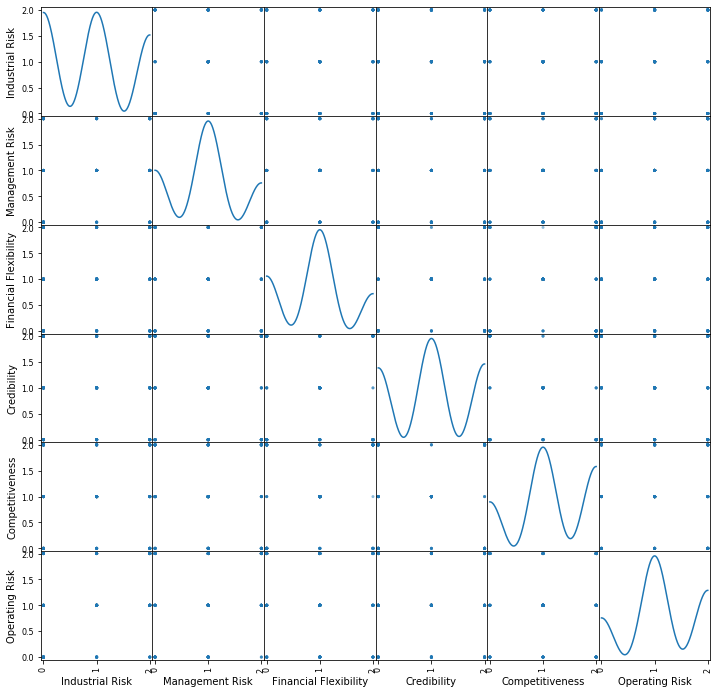

In [124]:
X_train_df = pd.DataFrame(X_train)
axes = pd.plotting.scatter_matrix(X_train_df,figsize=(12,12), diagonal = 'kde')
plt.show()

### Plotting the pairplot for all the columns against Class column

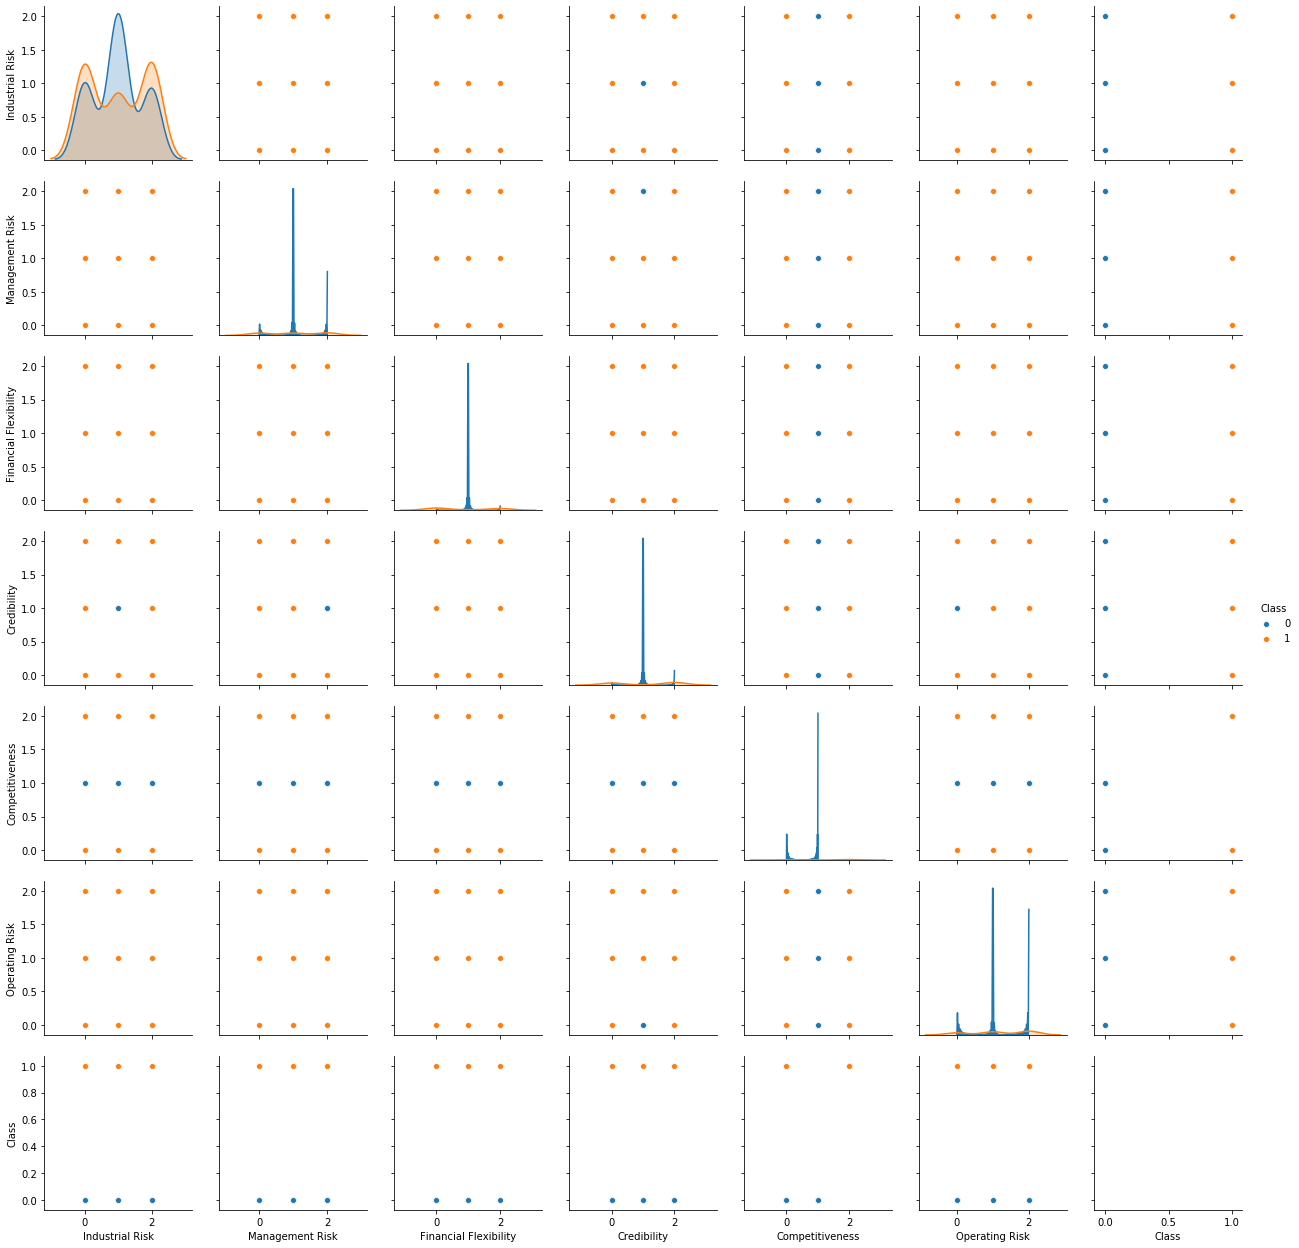

In [163]:
sns.pairplot(bd_df,diag_kind='kde',hue='Class')

In [125]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [126]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.66673437 -0.4379428   0.10744516  0.57702495  0.06522221 -0.12212775]
 [-0.42302627  0.08843229 -0.3332932  -0.48919311  0.61937115 -0.28144916]
 [ 0.01372372 -0.48485241  0.23754628 -0.46784563 -0.41800275 -0.56097748]
 [ 0.31491786 -0.25725872 -0.82135046  0.27463184 -0.09774223 -0.27395606]
 [ 0.18913615 -0.70310185 -0.00969137 -0.22692131  0.30442251  0.57062689]
 [-0.49130435  0.06906313 -0.3824035  -0.28624612 -0.57894088  0.43647278]]

 Eigen Values 
%s [0.76739766 0.69632672 0.63271994 0.48149938 0.40708304 0.45004865]


In [127]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [128]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.34005307  42.61112839  61.0305186   75.0476601   88.14922549
 100.        ]


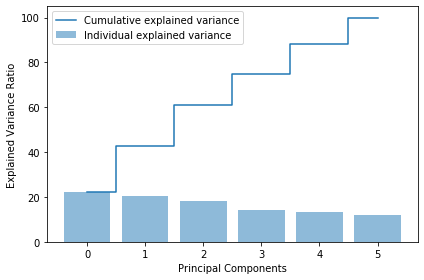

In [129]:
plt.figure(figsize=(6,4))
plt.bar(range(6), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(6), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### First 6 principal components of train data explain > 95 % of the variance in the data.

### 6-7 . Transforming all 6 PCs using standard scaler, applying k-Means clustering; 
Using elbow plot to compute required clusters.

In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Let us check optimal number of clusters-
X_std = StandardScaler().fit_transform(X_train)
cluster_range = range( 1, 6)   # expect few clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:100]

,num_clusters,cluster_errors
0,1,1200.000000
1,2,1027.644170
2,3,908.294545
3,4,809.873907
4,5,747.117981


#### Elbow plot

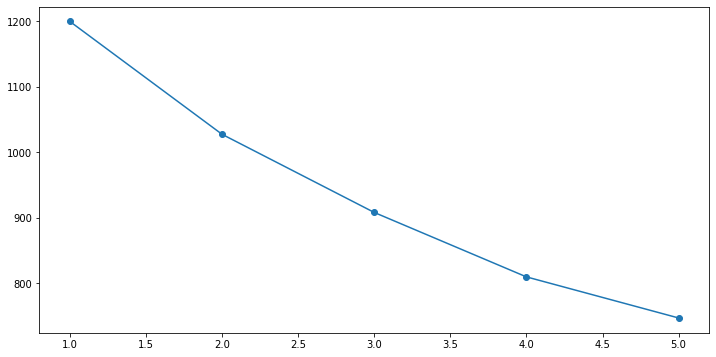

In [131]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Observation 
By seeing the elbow plot, we can conclude that number of cluster is 2.

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
print(__doc__)
cluster_range = range(2, 6)
print(cluster_range)
X_std = StandardScaler().fit_transform(X_train)
y_std = Y_train
X = X_std 
y = y_std.flatten()

print(X.shape)
print(X)
type(X)
print(X.ndim)
print(y.shape)
type(y)
print(y.ndim)
print(y)

Automatically created module for IPython interactive environment
range(2, 6)
(200, 6)
[[-1.18060256 -1.32059129  1.49086391 -1.28280474  1.17074863 -1.4969104 ]
 [ 1.30487651  0.0695048   0.09753315 -0.01270104 -0.14469927 -0.13608276]
 [-1.18060256  1.4596009   0.09753315 -1.28280474 -0.14469927 -0.13608276]
 ...
 [-1.18060256  0.0695048   0.09753315  1.25740266  1.17074863 -1.4969104 ]
 [ 0.06213698  0.0695048   0.09753315  1.25740266 -0.14469927  1.22474487]
 [ 1.30487651  1.4596009  -1.29579761  1.25740266  1.17074863 -0.13608276]]
2
(200,)
1
[1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1]


For n_clusters = 2 The average silhouette_score is : 0.1365564762651839


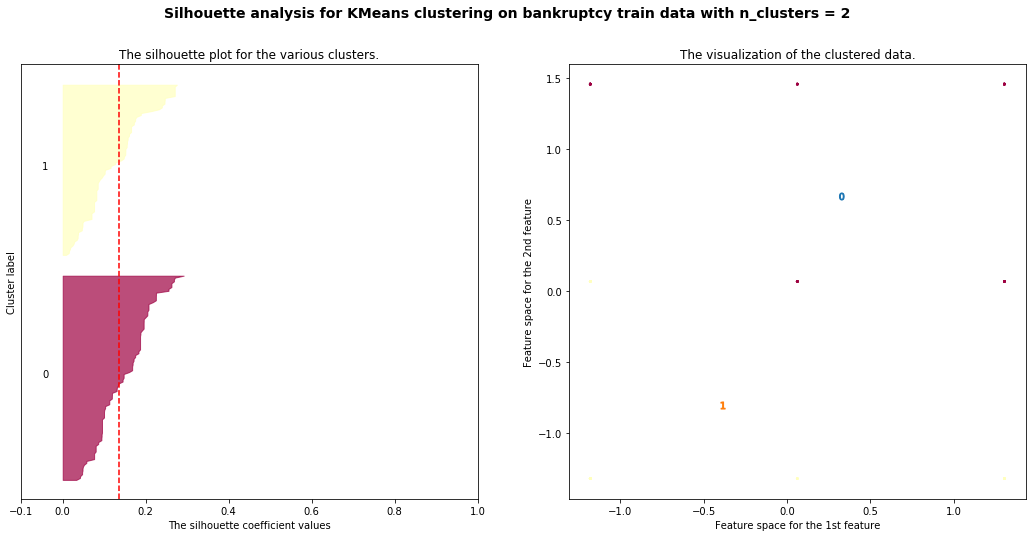

For n_clusters = 3 The average silhouette_score is : 0.1599337408828311


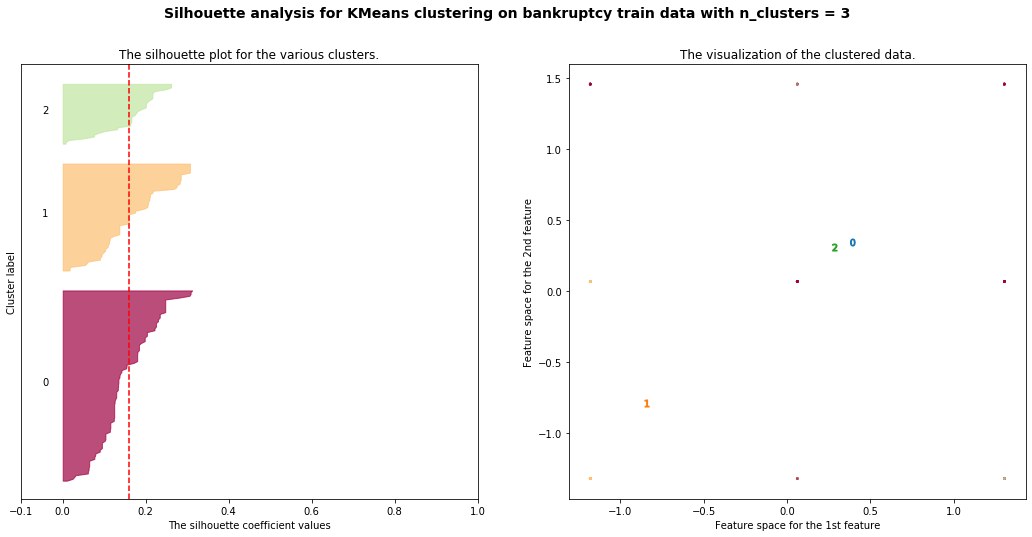

For n_clusters = 4 The average silhouette_score is : 0.1548835291495725


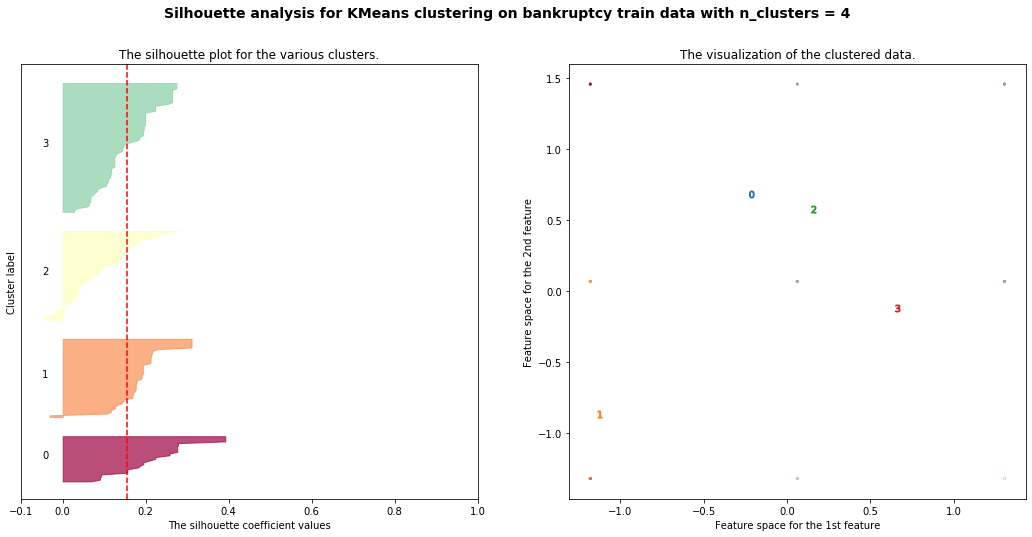

For n_clusters = 5 The average silhouette_score is : 0.17141641278808642


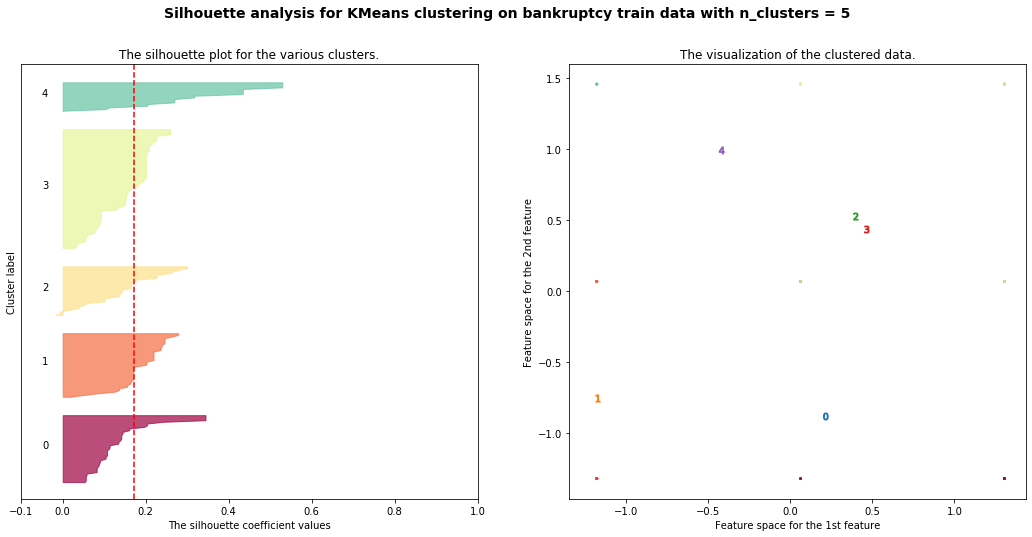

In [133]:
for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters, random_state=10)
    #print(clusterer)
    clusterer = clusterer.fit(X)
    clusterer_labels = clusterer.labels_     # capture the cluster lables
    
    #clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    #cluster_labels = clusterer.fit_predict(X_train)
    
    #print("For n_clusters =", n_clusters,
    #      "The clusterer_labels is :", clusterer_labels)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)
    #print("For n_clusters =", n_clusters,
    #      "The sample silhouette_value is :", sample_silhouette_values)
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusterer_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(clusterer_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.5,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on bankruptcy train data "
        "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()

#### Observation
The silhouette plot shows that the values of n_clusters = 3, 4 or 5 are not recommended for the given data due to wide fluctuations in the size of the silhouette plots, For the value of n_cluster=2 the plots are more or less of similar thickness.


### Applying K-Means cluster

In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_std)
# Getting the cluster labels
labels = kmeans.predict(X_std)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids) # From sci-kit learn
print("labels")
print(labels) # From sci-kit learn

sklearn
Centroid values
[[ 0.29362767  0.43747142 -0.20298917 -0.174577   -0.20918201  0.65106263]
 [-0.30561248 -0.45532739  0.21127444  0.18170259  0.21772005 -0.67763662]]
labels
[1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0]


### 10. creating new column in the train data and populate it with cluster labels

In [135]:
X_train.shape

(200, 6)

In [136]:
labels.shape

(200,)

In [137]:
df = pd.DataFrame(X_train)
df.insert(6, "Cluster Labels", labels, True)

In [138]:
X_train.shape

(200, 7)

### using k-means object, assign cluster labels to test data and storing the same in test data

In [141]:
labels = kmeans.predict(X_test)

In [142]:
X_test.shape

(50, 6)

In [143]:
labels.shape

(50,)

In [144]:
df = pd.DataFrame(X_test)
df.insert(6, "Cluster Labels", labels, True)

### transform the test data using the PCA object

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train)
#X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#print(X_train_pca.shape)
print(X_test_pca.shape)

(50, 6)


##  applying different SVC models on train data and predicting target

#### 1. Liner SVC Model

In [147]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\arupm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### accuracy and confusion matrix

In [148]:
# check the accuracy on the training set
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.515
0.56


In [149]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[ 2  3]
 [19 26]]


#### 2. RBF  SVC model

In [150]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\arupm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### accuracy and confusion matrix - highest accuracy !!

In [151]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.995
1.0


In [152]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


#### Poly SVC model

In [164]:
# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\arupm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.98
1.0


In [155]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


#### Sigmoid SVC model

In [156]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\Users\arupm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.24
0.16


In [158]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[ 0 21]
 [21  8]]
